# Assignment 1

**Student : Kishankumar Bhimani**

In [1]:
name = 'Kishankumar Bhimani'
if name is None:
    raise ValueError("Put your full name in the `name` variable")

The objective of this assignment is to test a bunch of different topics we've discussed during our introductory classes. Complete the following exercises:

## Instructions

Complete the notebook and create a folder with your name, and put the notebook in that folder. Make a Pull Request with your code.

## Exercise 0

Write your own simple function with simple documentation and all types of arguments (positional, positional with defaults, arbitrary args, keyword args, arbitrary keyword args)

In [2]:
# your code here
def my_function(positional_arg, default_arg="default", *args, keyword_arg1=None, **kwargs):
    result = {
        "positional_arg": positional_arg,
        "default_arg": default_arg,
        "args": args,
        "keyword_arg1": keyword_arg1,
        "kwargs": kwargs
    }
    return result

output = my_function(
    "Required",
    "Custom default value",
    1, 2, 3, 4,
    keyword_arg1="Keyword argument",
    extra1="Extra keyword",
    extra2=42
)

print(output)

{'positional_arg': 'Required', 'default_arg': 'Custom default value', 'args': (1, 2, 3, 4), 'keyword_arg1': 'Keyword argument', 'kwargs': {'extra1': 'Extra keyword', 'extra2': 42}}


## Exercise 1


In [3]:
def is_prime(n):
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False

    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6

    return True

# Examples
print(is_prime(2))
print(is_prime(11))
print(is_prime(15))
print(is_prime(97))

True
True
False
True


## Exercise 2

[Inspect](https://docs.python.org/3.7/library/inspect.html) will help you. Use `my_function` for tests.



In [4]:
import inspect

def inspect_function(func):
    if not callable(func):
        raise ValueError("The provided argument is not a callable function.")

    signature = inspect.signature(func)
    parameters = signature.parameters

    print(f"Function Name: {func.__name__}")
    print("Arguments:")
    for param_name, param in parameters.items():
        param_type = param.kind.name
        default_value = param.default if param.default != inspect.Parameter.empty else "No default"
        print(f"  - {param_name}: {param_type}, Default: {default_value}")

# Example
def my_function(positional_arg, default_arg="default", *args, keyword_arg1=None, **kwargs):
    pass

inspect_function(my_function)

Function Name: my_function
Arguments:
  - positional_arg: POSITIONAL_OR_KEYWORD, Default: No default
  - default_arg: POSITIONAL_OR_KEYWORD, Default: default
  - args: VAR_POSITIONAL, Default: No default
  - keyword_arg1: KEYWORD_ONLY, Default: None
  - kwargs: VAR_KEYWORD, Default: No default


## Exercise 3

The `my_time_now` function is not working correctly. Correct it so that it displays the current time with a message.

In [5]:
from datetime import datetime
from time import sleep

# Corrected function
def my_time_now(msg, *, dt=None):
    if dt is None:
        dt = datetime.now()
    print(msg, dt)

In [6]:
# simple tests :)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')

The time is now:  2025-01-11 13:39:38.050613
The time is now:  2025-01-11 13:39:39.051677
The time is now:  2025-01-11 13:39:40.052689


## Exercise 4

In [7]:
def limit(input_generator, max_count):
    count = 0
    for value in input_generator:
        if count >= max_count:
            break
        yield value
        count += 1

# Example
def sample_generator():
    for i in range(1, 100):
        yield i

limited_gen = limit(sample_generator(), 5)
print(list(limited_gen))

[1, 2, 3, 4, 5]


## Exercise 5

Write a generator for an infinite sequence of numbers from the Pascal's triangle. The sequence look like this:
`1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1 ... '

Test it with a generator from the previous task)

In [8]:
def pascal_triangle():
    row = [1]
    while True:
        for num in row:
            yield num
        row = [1] + [row[i] + row[i + 1] for i in range(len(row) - 1)] + [1]

limited_pascal = limit(pascal_triangle(), 20)
print(list(limited_pascal))

[1, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 4, 6, 4, 1, 1, 5, 10, 10, 5]


## Exercise 6


In [9]:
import pathlib  # can change to os module if you want
import sys

def files_sorted_by_size(path_to_dir):
    path_to_dir = pathlib.Path(path_to_dir)
    if not path_to_dir.is_dir():
        raise ValueError(f"The provided path '{path_to_dir}' is not a valid directory.")

    files_with_sizes = [
        (file, file.stat().st_size) for file in path_to_dir.iterdir() if file.is_file()
    ]

    files_with_sizes.sort(key=lambda x: (x[1], x[0].name))

    return [(str(file), size) for file, size in files_with_sizes]

# Example
if __name__ == "__main__":
    path = "/content/sample_data"  # your directory path
    try:
        sorted_files = files_sorted_by_size(path)
        print("Files sorted by size:")
        for file, size in sorted_files:
            print(f"{file} - {size} bytes")
    except ValueError as e:
        print(e)

Files sorted by size:
/content/sample_data/README.md - 962 bytes
/content/sample_data/anscombe.json - 1697 bytes
/content/sample_data/california_housing_test.csv - 301141 bytes
/content/sample_data/california_housing_train.csv - 1706430 bytes
/content/sample_data/mnist_test.csv - 18289443 bytes
/content/sample_data/mnist_train_small.csv - 36523880 bytes


## Exercise 7

Write a `merge_sorter` generator that merges sorted sequences of integers.

The generator takes an arbitrary number of arguments. The argument can be any iterable, including another generator. It is guaranteed that each argument is a sequence of integers, sorted in non-decreasing order.

In [10]:
def merge_sorter(*args):
    import heapq

    iterators = [iter(arg) for arg in args]
    heap = []

    for i, it in enumerate(iterators):
        try:
            first_element = next(it)
            heapq.heappush(heap, (first_element, i))
        except StopIteration:
            pass

    while heap:
        value, iterator_index = heapq.heappop(heap)
        yield value

        try:
            next_value = next(iterators[iterator_index])
            heapq.heappush(heap, (next_value, iterator_index))
        except StopIteration:
            pass

In [11]:
list1 = [1, 4, 7]
list2 = [2, 5, 8]
list3 = [3, 6, 9]

result = merge_sorter(list1, list2, list3)
print(list(result))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


## Exercise 8

Write the decorator `proﬁler`, which, when calling a function, will store in its attributes (not to be confused with arguments) the time of its execution (in seconds, it can be fractional) and the number of recursive calls that occurred during execution. Name the attributes `last_time_taken` and `calls`.
It is forbidden to use global variables.
The decorator must behave in a decent manner, that is, it must not overwrite the function's documentation.

For tests write [Ackermann function](https://en.wikipedia.org/wiki/Ackermann_function)

In [12]:
import time
from functools import wraps

def profiler():
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            wrapper.calls = 0

            def wrapped_function(*args, **kwargs):
                wrapper.calls += 1
                return func(*args, **kwargs)

            start_time = time.time()
            result = wrapped_function(*args, **kwargs)
            wrapper.last_time_taken = time.time() - start_time
            return result

        wrapper.calls = 0
        wrapper.last_time_taken = 0.0
        return wrapper
    return decorator

@profiler()
def ackermann(n, m):
    if n == 0:
        return m + 1
    elif m == 0:
        return ackermann(n - 1, 1)
    else:
        return ackermann(n - 1, ackermann(n, m - 1))

# Example
if __name__ == "__main__":
    try:
        print(ackermann(2, 2))
        print(f"Time taken: {ackermann.last_time_taken} seconds")
        print(f"Recursive calls: {ackermann.calls}")
    except RecursionError:
        print("Recursion limit reached!")

7
Time taken: 5.8650970458984375e-05 seconds
Recursive calls: 1


## Exercise 9

Write the function `encode` that implements [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding) algorithm

In [13]:
def encode(sequence):
    if not sequence:
        return ""

    encoded = []
    count = 1

    for i in range(1, len(sequence)):
        if sequence[i] == sequence[i - 1]:
            count += 1
        else:
            encoded.append(f"{count}{sequence[i - 1]}")
            count = 1

    encoded.append(f"{count}{sequence[-1]}")

    return "".join(encoded)

# Example
if __name__ == "__main__":
    print(encode("AAAABBBCCDAA"))

4A3B2C1D2A


## Exercise 10

Write a decorator `visualizer` that takes a recursive function and will visualize the recursive calls that are made during the execution.
Consider using the `networkx` library or some other one in order to draw the recursion tree.
Test it with a recursive function that computes fibonacci.

In [14]:
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

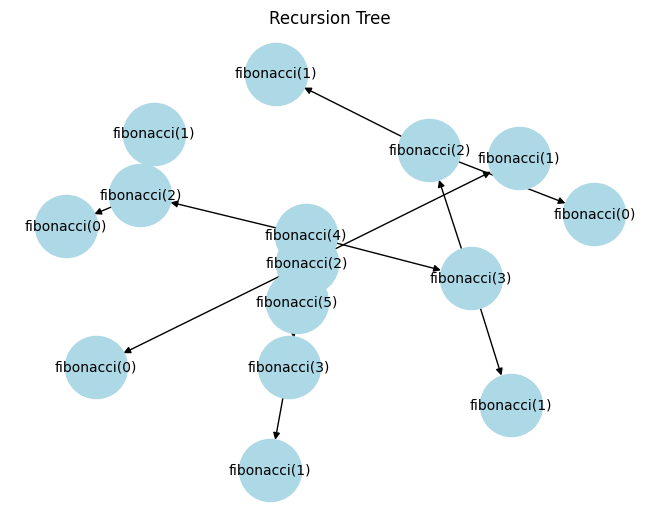

5

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

def visualizer(func):
    def wrapper(*args, **kwargs):
        G = nx.DiGraph()
        call_stack = []
        node_counter = [0]

        def visualize_recursion(n, parent=None):
            current_node = f"{func.__name__}({n})-{node_counter[0]}"
            node_counter[0] += 1
            G.add_node(current_node, label=f"{func.__name__}({n})")

            if parent:
                G.add_edge(parent, current_node)

            return current_node

        def traced_func(n, parent=None):
            current_node = visualize_recursion(n, parent)
            if n == 0 or n == 1:
                return n
            else:
                left = traced_func(n - 1, current_node)
                right = traced_func(n - 2, current_node)
                return left + right

        result = traced_func(*args)

        pos = nx.spring_layout(G)
        labels = nx.get_node_attributes(G, 'label')
        nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, node_color='lightblue', font_size=10)
        plt.title("Recursion Tree")
        plt.show()

        return result

    return wrapper

# Example
@visualizer
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n - 1) + fibonacci(n - 2)

fibonacci(5)

## Exercise 11

Now write a decorator `memoizer` that will do caching on the calls of a function (memoization).
Decorate fibonacci with the decorators `memoizer`, `profiler` and `visualizer` at the same time (not necessarily in that order). Test that they're working as one would expect.

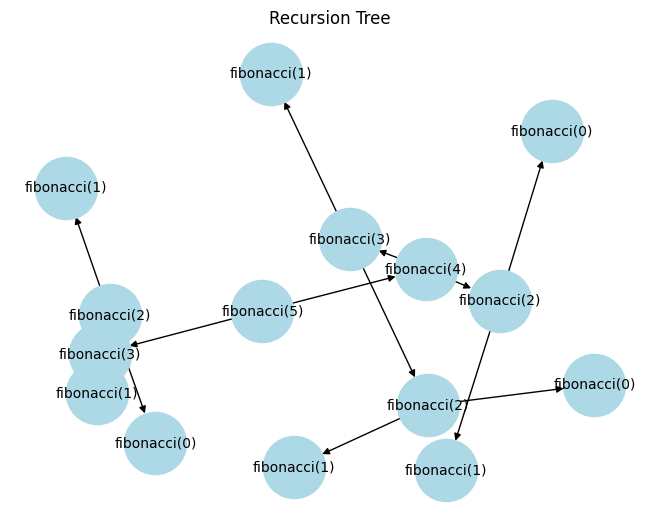

Function 'wrapper' called with arguments (5,). Execution time: 0.451196 seconds.


5

In [16]:
import functools
import time
import networkx as nx
import matplotlib.pyplot as plt

def memoizer(func):
    cache = {}

    @functools.wraps(func)
    def wrapper(*args):
        if args in cache:
            return cache[args]
        result = func(*args)
        cache[args] = result
        return result

    return wrapper

def profiler(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        elapsed_time = time.time() - start_time
        print(f"Function '{func.__name__}' called with arguments {args}. Execution time: {elapsed_time:.6f} seconds.")
        return result

    return wrapper

def visualizer(func):
    def wrapper(*args, **kwargs):
        G = nx.DiGraph()
        call_stack = []
        node_counter = [0]

        def visualize_recursion(n, parent=None):
            current_node = f"{func.__name__}({n})-{node_counter[0]}"
            node_counter[0] += 1
            G.add_node(current_node, label=f"{func.__name__}({n})")

            if parent:
                G.add_edge(parent, current_node)

            return current_node

        def traced_func(n, parent=None):
            current_node = visualize_recursion(n, parent)
            if n == 0 or n == 1:
                return n
            else:
                left = traced_func(n - 1, current_node)
                right = traced_func(n - 2, current_node)
                return left + right

        result = traced_func(*args)

        pos = nx.spring_layout(G)
        labels = nx.get_node_attributes(G, 'label')
        nx.draw(G, pos, with_labels=True, labels=labels, node_size=2000, node_color='lightblue', font_size=10)
        plt.title("Recursion Tree")
        plt.show()

        return result

    return wrapper

@memoizer
@profiler
@visualizer
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n - 1) + fibonacci(n - 2)

fibonacci(5)

## Exercise 12

By using the `isinstance` method, check whether the following objects belong to the proposed types (hint: `isinstance`).

Visualize this correspondance matrix (object – type), e.g. using numpy and [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) for visualization.

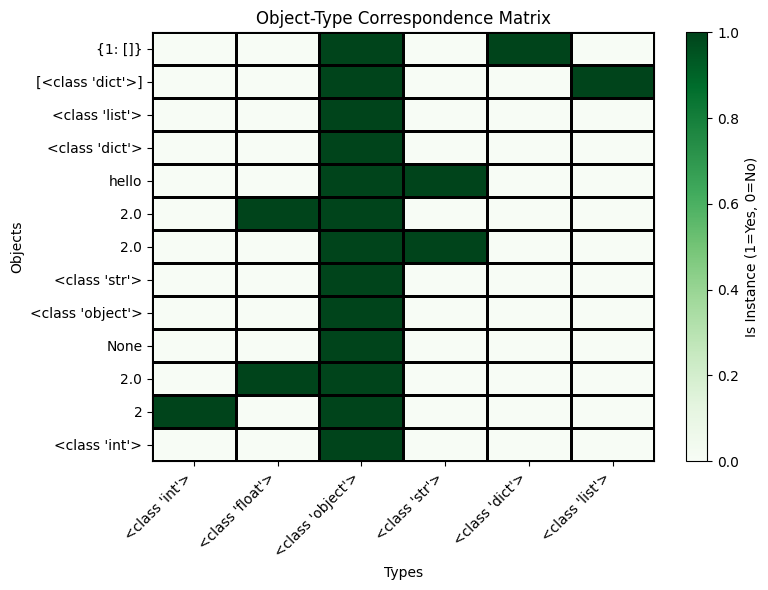

In [17]:
import numpy as np
import matplotlib.pyplot as plt

list_of_objects = [
    int,
    2,
    2.0,
    None,
    object,
    str,
    str(2.0),
    float("2.0"),
    "hello",
    dict,
    list,
    [dict],
    {1: []},
]

list_of_types = [
    int,
    float,
    object,
    str,
    dict,
    list,
]

correspondence_matrix = np.zeros((len(list_of_objects), len(list_of_types)), dtype=int)

for i, obj in enumerate(list_of_objects):
    for j, typ in enumerate(list_of_types):
        correspondence_matrix[i, j] = isinstance(obj, typ)

plt.figure(figsize=(8, 6))
plt.pcolormesh(correspondence_matrix, cmap="Greens", edgecolors="black", linewidth=1)

plt.xticks(np.arange(len(list_of_types)) + 0.5, list_of_types, rotation=45, ha="right")
plt.yticks(np.arange(len(list_of_objects)) + 0.5, [str(obj) for obj in list_of_objects])

plt.xlabel("Types")
plt.ylabel("Objects")
plt.title("Object-Type Correspondence Matrix")
plt.colorbar(label="Is Instance (1=Yes, 0=No)")
plt.tight_layout()
plt.show()